Final Cost is:  0.35905041818939165
Mean squared error is: 0.6841668945599262


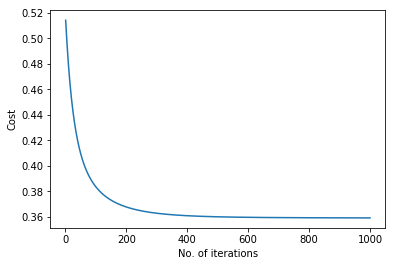

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv("winequality-red.csv",sep=';') # reading the csv and making df by separating at ;
df2 = pd.read_csv("winequality-white.csv", sep = ';')

df = df1.append(df2) # joining the two dfs

df = (df - df.mean())/df.std() # Scaling the df

df.iloc[np.random.permutation(len(df))].reset_index(drop=True) # Shuffling the df for better prediction since we have joined two dfs.

X_train = df.iloc[0:5200 ,0:11]
X_test = df.iloc[5200:6497 ,0:11]
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)

y_train = df.iloc[0:5200 ,11:12].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
y_test = df.iloc[5200:6497, 11:12]
theta = np.zeros([1,12])

# Setting hyper parameters
alpha = 0.01
iters = 1000

def computeCost(X_train,y_train,theta):
    to_be_summed = np.power(((np.dot(X_train,theta.T))-y_train),2)
    return np.sum(to_be_summed)/(2 * len(X_train))

def gradientDescent(X_train,y_train,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X_train)) * np.sum(X_train * (np.dot(X_train,theta.T) - y_train), axis=0)
        cost[i] = computeCost(X_train, y_train, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X_train,y_train,theta,iters,alpha)

finalCost = computeCost(X_train,y_train,g)
print('Final Cost is: ',finalCost)

from sklearn.metrics import mean_squared_error
def model_predict(x_test,y_test,theta):
    theta0 = theta[0][0]
    theta1 = theta[0][1:]
    theta1 = np.reshape(theta1,(x_test.shape[1],1))
    y_pred = np.ones(x_test.shape[0])
    y_pred = np.reshape(y_pred,(x_test.shape[0],1))
    for i in range(0,len(x_test)):
        x_test2 = np.array(x_test.iloc[i,:]).reshape(1,x_test.shape[1])
        y_pred[i] = theta0 + np.dot(x_test2,theta1)
    
    y_test = np.reshape(y_test,(x_test.shape[0],1))
    mse=mean_squared_error(y_test, y_pred)
    
    return mse

mse = model_predict(X_test,y_test,g)
print('Mean squared error is:', mse)

def plotdata():
	cost1 = list(cost)
	n_iterations = [x for x in range(1,iters+1)]
	plt.plot(n_iterations, cost1)
	plt.xlabel('No. of iterations')
	plt.ylabel('Cost')
	plt.show()
plotdata()